In [110]:
import numpy as np
import skimage as ski
from skimage import io, transform
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] =(12,9)
import compression as comp

 This notebook indicates how to take point positions, compress them, then decompress them again using the compressed sensing approach of Xue 2017. 

In [111]:
#run these if you want to reload imported modules every time the code is run 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/kvnp/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


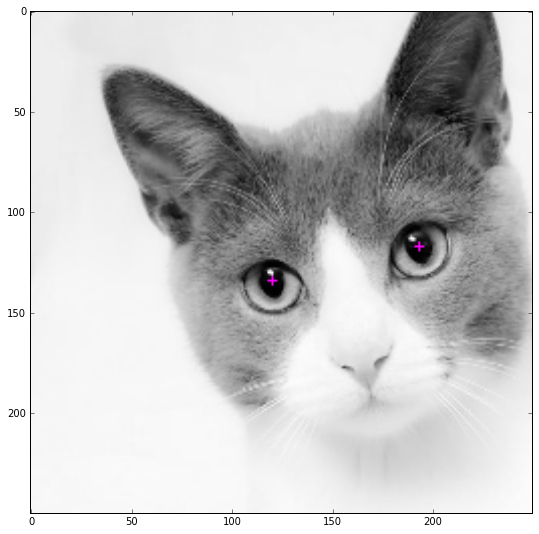

In [112]:
# import image and identify a few points 
im = ski.io.imread('meow.jpeg',as_grey=True)[:,:640]
im = ski.transform.resize(im,(250,250))
eye1 = np.array([117,193])
eye2 = np.array([134,120])
comp.view_points(im,[eye1,eye2])

In [113]:
# now compress the points
N=100 # number of elements in each compressed vector
L=51 # number of compressed vectors to encode the points  MUST BE ODD 
M = int(round(np.sqrt(im.shape[0]**2+im.shape[1]**2)))
F = comp.project([eye1,eye2],shape=im.shape,L=L,M=M) #uncompressed vector representations of points eye1 and eye2
S = comp.sensing_matrix(N,M)
Y = comp.encode(F,N,S) #encode into length N vectors. S is the sensing matrix

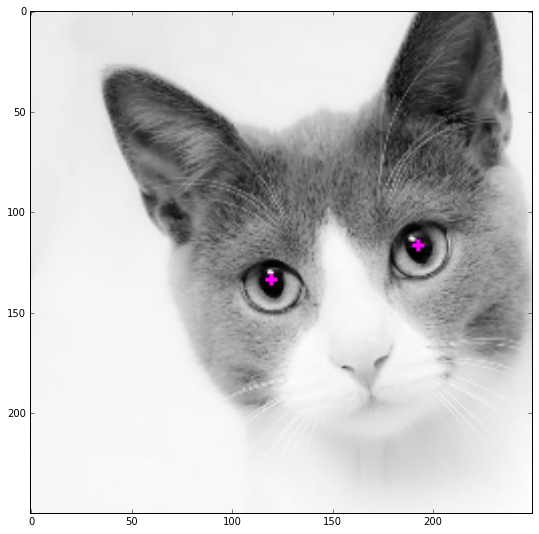

In [118]:
# now decompress the points
F_hat = comp.decode(Y,S) #decode it back to predictions of F
points_hat = comp.unproject(F_hat,im.shape,L,M)

# and view the reprojected points
comp.view_points(im,points_hat)